# Online GameStore Analysis


# Author : James Amezcua

# Introduction

This report presents the analysis of the video games sales data from the online store Ice, spanning over 30 years from 1980 to 2016.

The dataset contains information of the games' platform and genre, the year they were released, their sales in three regions, North America, Europe, and Japan, expert and user review scores, and their ESRB (Entertainment Software Rating Board) rating.

The goal of the analysis is to identify patterns that determine whether a game succeeds or not, which will then allow the store owners to spot potential sales winners and plan advertising campaigns.

The report first shows the steps followed to prepare the data for analysis, then the exploratory data analysis addressing key questions including:

the pattern in releasing games;
how sales varied across platforms and how that changes over time;
how user and professional reviews affect sales;
how sales of same games varied across platforms; and
how genres affected sales.
Following the above analysis, a user profile will be created for each of the three regions. We will take a look at the top five platforms and genres for each region, and how ESRB ratings affect sales in individual regions.

Finally, we will test 2 hypotheses:

average user ratings of the Xbox One and PC platforms are the same.
average user ratings for the Action and Sports genres are different.


# Table of contents

Part 1. Open the data file and study the general information

Part 2. Prepare the data

Part 3. Exploratory data analysis

Part 4. Create a user profile for each region

Part 5. Test the hypothesis

Part 6. Overall conclusion

# Part 1. Open the data file and study the general information

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd
import random
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# matplotlib for visualization
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline

# seaborn for statistical data visualization
import seaborn as sns

# import the math and scipy packages for statistical analysis
import math as mt
from math import factorial
from scipy import stats as st

# tree map visualization
!pip install squarify
import squarify

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

print('Project libraries has been successfully been imported!')

Defaulting to user installation because normal site-packages is not writeable
Project libraries has been successfully been imported!


In [2]:
# read the data
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    df = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Integrated Project 1/Data/games.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [3]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [4]:
# study the general information about the dataset 
print('General information about the dataframe')
get_info(df)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


----------------------------------------------------------------------------------------------------


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990



Columns with nulls:
Column Name has 0.0120% percent of Nulls, and 2 of nulls
Column Year_of_Release has 1.6093% percent of Nulls, and 269 of nulls
Column Genre has 0.0120% percent of Nulls, and 2 of nulls
Column Critic_Score has 51.3192% percent of Nulls, and 8578 of nulls
Column User_Score has 40.0897% percent of Nulls, and 6701 of nulls
Column Rating has 40.4786% percent of Nulls, and 6766 of nulls
There are 6 columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(16715, 11)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




# Conclusion

From the general information, we can see that 6 columns have null values. The Name column has 0.0120% null values, Year_of_Release has 1.6093%, Genre has 0.0120%, Critic_Score has 51.3192%, User_Score has 40.0897%, and Rating has 40.4786% of null values. Also, we need to convert the data to the required type, and deal with missing values in the dataset. Year_of_Release is in float, should be converted to int. User_Score is a string and should be converted to int. One interesting thing to note is that the missing values in the Name and Genre are both visible error in the data i.e., value for the "Name" and "Genre" are not available for that row. The Year_of_release is missing at random (MAR) so we need to replace them as well. On the otherhand, the Critic_Score, User_Score, and Rating are missing not at random (MNAR) i.e., if the critical score is missing, then in most cases the user score and/or rating will be missing as well. This looks like there was no record for the Critic_Score, User_Score, and Rating in that row of the data.

# Part 2. Prepare the data

# Replace the column names

In [5]:
# function to convert column names to lowercase
def lowercase_columns(df):
    return df.rename(str.lower, axis='columns')

df = lowercase_columns(df)
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


# Processing Missing Values

In [6]:
 #function to calculate the percentage of missing values
def missing_values_table(df):
    """
    This function calculates the percentage of
    missing values in the dataset
    """
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [7]:
# check missing data
missing_values_table(df)

Your selected dataframe has 11 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
critic_score,8578,51.3
rating,6766,40.5
user_score,6701,40.1
year_of_release,269,1.6
name,2,0.0
genre,2,0.0


We can drop the missing values in the name and genre column without affecting our analysis. We do this because there is no logical way to replace the missing names and genre with the median or mode of these values. Also, since the percent of missing value for those column is low, we can drop the missing value without loss of statistical power.

# Dropping missing values in name and genre column

In [8]:
# drop 'NaNs' in name and genre column
df = df.dropna(subset=['name', 'genre']).reset_index(drop=True)

Prepare year_of_release, user_score, rating, critic_score column

To replace missing values in the year_of_release column, we first get the unique values of name, then get the list of possible year of release for those names. We then choose a random value from that list (excluding the nan values) and assign that to the missing year of release for that name in the dataframe. For unique names with an empty list, we use the mode of the value in the year_of_release column. We perform the same operation in the user_score, rating, and critical_score. This method of filling in missing value is effective because we are filling missing values with value that share similar characteristic with other columns in the dataset.

In [70]:
# function to assign random value from unique values in column
def fill_in_year_of_release(df):
    # get unique values of name from this dataframe
    for name in df['name'].unique().tolist():
        # get specific 'name' possible year of release 
        specific_name_df = df[df['name'] == name].dropna()['year_of_release']
        name_year_list = specific_name_df.unique().tolist()
        # for the misssing values, assign a random choice of the release year for that name type. The default value is the mode of year_of_release
        if name_year_list != []:
            df.loc[(df['name'] == name) & (df['year_of_release'] != df['year_of_release']), 'year_of_release'] = random.choice(name_year_list)
        else:
            df.loc[(df['name'] == name) & (df['year_of_release'] != df['year_of_release']), 'year_of_release'] = df['year_of_release'].mode()[0]
            # df['year_of_release'] = df['year_of_release'].astype(int)

def fill_in_user_score(df):
    df['user_score'] = df['user_score'].replace('tbd', np.nan)
    # get unique values of platform from the dataframe
    for user_score in df['platform'].unique().tolist():
        # get specific platform's user_score
        specific_score_df = df[df['platform'] == user_score].dropna()['user_score']
        user_score_list = specific_score_df.unique().tolist()
        if user_score_list != []:
            df.loc[(df['platform'] == user_score) & (df['user_score'] != df['user_score']), 'user_score'] = random.choice(user_score_list)
        else:
            df.loc[(df['platform'] == user_score) & (df['user_score'] != df['user_score']), 'user_score'] = df['user_score'].median()     
            
def fill_in_rating(df):
    for rating in df['platform'].unique().tolist():
        specific_rating_df = df[df['platform'] == rating].dropna()['rating']
        rating_list = specific_rating_df.unique().tolist()
        if rating_list != []:
            df.loc[(df['platform'] == rating) & (df['rating'] != df['rating']), 'rating'] = random.choice(rating_list)
        else:
            df.loc[(df['platform'] == rating) & (df['rating'] != df['rating']), 'rating'] = df['rating'].mode()[0]   
              
def fill_in_critic_score(df):
    # get unique values of platform from the dataframe
    for critic_score in df['platform'].unique().tolist():
        # get specific platform's critic_score
        specific_score_df = df[df['platform'] == critic_score].dropna()['critic_score']
        critic_score_list = specific_score_df.unique().tolist()
        if critic_score_list != []:
            df.loc[(df['platform'] == critic_score) & (df['critic_score'] != df['critic_score']), 'critic_score'] = random.choice(critic_score_list)
        else:
            df.loc[(df['platform'] == critic_score) & (df['critic_score'] != df['critic_score']), 'critic_score'] = df['critic_score'].median()

# Fill in missing values in year_of_release, user_score, rating, critic_score column

In [10]:
# fill in missing values
fill_in_year_of_release(df)
fill_in_user_score(df)
fill_in_rating(df)
fill_in_critic_score(df)

In [11]:
# view dataframe
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,72.0,7.3,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.0,7.3,E


In [12]:
# re-check for missing values in our data
missing_values_table(df)

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Conclusion: We have been able to process the missing values in the name, genre, year_of_release, user_score, rating, critic_score column. In the name and genre column, we dropped the rows with missing values since the missing values are less than 1%. In the year_of_release, user_score, rating, critic_score column, we applied a special function to fill in missing values with random value from unique values of the column. In the case where the unique value is empty, we fill in the missing values with the median or mode of the column. The abbreviation tbd was handled as an 'NaN' in the dataset. After re-inspecting for missing values, we can see that has no missing values and is ready for analysis. Before we proceed with analysis, we need to convert datatypes to the right type.

# Convert Datatypes

In [13]:
# convert data to the correct data type
def convert_to_type(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)
        
convert_to_type(df, ['name', 'platform', 'genre', 'rating'], str)
convert_to_type(df, ['year_of_release', 'critic_score'], 'int64')
convert_to_type(df, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'user_score'], float)

In [14]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


We can see that our data is now in the correct data type.


# Calculate the total sales

In [15]:
# Total sales in all region
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,72,7.3,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72,7.3,E,31.38


Conclusion


In this section, we prepared the data by converting the column names to lower case. We dropped missing values in the name and genre column. We filled in missing values in the year_of_release, user_score, rating, critic_score column. The abbreviation tbd which means "to be determined" was mapped to null and handled as an 'NaN' in the dataset. We converted datatypes to the right types and calculated the total sales in all region.

# Part 3: Exploratory data analysis


The below plot functions will be needed to plot and visualize the data.

In [16]:
# function to plot lollipop chart
def plot_lollipop(df, x, y, title, ylabel):
    fig, ax=plt.subplots(figsize=(12,6))
    ax.vlines(x = df[x], ymin=0, ymax = df[y], color='purple', alpha=0.5, linewidth=2)
    ax.scatter(x = df[x], y= df[y], s= 75, color='blue', alpha=0.7)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontdict={'size':12})
    ax.set_xlabel(x, fontdict={'size':12})
    ax.set_xticks(df[x])
    ax.set_xticklabels(df[x], rotation=90, fontdict={'horizontalalignment':'right', 'size':10})    
    
# function to plot distribution chart with matplotlib
def plot_distribution(df, x, y, column ='', value='', func=np.sum):
    if column != '' and value != '':
        filter_df = df[df[column] == value]
        plot_df = filter_df.pivot_table(index=x, values=y, aggfunc=func)
        values_to_plot = plot_df[y].values
    else:
        plot_df = df.pivot_table(index=x, values=y, aggfunc=func)
        values_to_plot = plot_df[y].values
    xlabel = x.replace('_', ' ').capitalize()
    ylabel = str(y.replace('_', ' ').capitalize())
    title = str(value) + " - " + ylabel + " vs. " + xlabel
    ax = plot_df.plot(kind='bar', figsize=(12,6), rot=45, title=title, edgecolor='silver', legend=False)
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_title(title, fontdict={'size':12}, fontweight='bold')
    # place annotate on top of bars
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontweight='bold', color='dodgerblue', horizontalalignment='left', size=10)
        
# function to plot an ordered box plot using seaborn 
def plot_box(df, x, y, ylabel, title, func):
    xlabel = str(x.replace('_', ' ').capitalize())
    ylabel = ylabel
    plt.figure(figsize=(12,8))
    # create a grouped data
    grouped = df.groupby([x, 'year_of_release'])[y].agg(func).reset_index() # specify func as `sum()` or `mean()` or `count()`
    # create an ordered list
    ordered = grouped.groupby([x])[y].agg(func).sort_values().reset_index()[x]
    # plot box plot
    sns.boxplot(x=x, y=y, data=grouped, order=ordered)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    
# function to plot seaborn barplot
def plot_snsbar(df, x, y, title):
    xlabel = str(x.replace('_', ' ').capitalize())
    ylabel = str(y.replace('_', ' ').capitalize())
    # create grouped data
    data = df.groupby([x])[y].count().sort_values(ascending=False).reset_index()
    fig, ax=plt.subplots(figsize=(12,6))
    ax = sns.barplot(x = x, y = y, data=data)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_xticklabels(data[x], rotation=90);


Look at how many games were released in different years


How many games were released in different years?

In [17]:
# create a copy of dataframe
games_data = df.copy()
(games_data.rename(
   columns = {'year_of_release': 'year of release', 'na_sales': 'na sales', 'eu_sales': 'eu sales', 'jp_sales': 'jp sales', 'other_sales': 'other sales', 'critic_score': 'critic score', \
              'user_score': 'user score', 'total_sales': 'total sales'}, inplace = True, errors = 'raise')
)

In [18]:
# groupby year_of_release and count the games released
games_df = (games_data[['year of release', 'name']]
                .groupby('year of release')
                .agg('count')
                .sort_values('year of release').reset_index()
)

games_df.head()

,year of release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


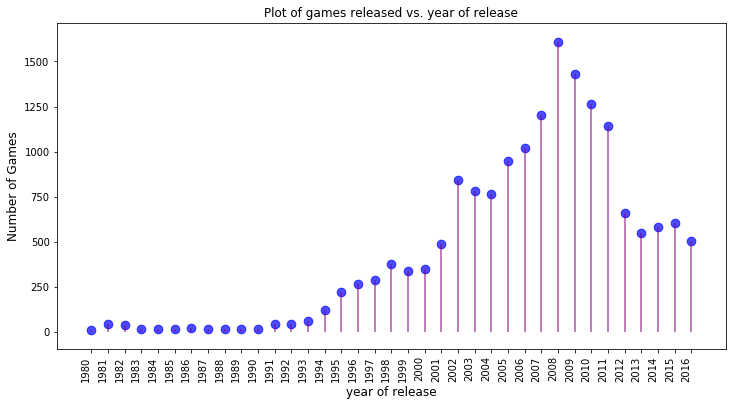

In [19]:
# plot of games by year of release
plot_lollipop(games_df, 'year of release', 'name', 'Plot of games released vs. year of release', 'Number of Games')

The lollipop plot above shows that the more games were released in the years 2001 to 2016. This is reasonable because it coincide with the emergence of web 2.0 and the rise of the internet in the first decade of the twenty-first century. More online gaming, mobile gaming devices, and streaming services were created so more games were released because people play games on the home console, via internet, mobile console, and mobile phones. Most games were released between years 2005 and 2011. The year with the lowest game released was 1980. The year with the highest number of games released was 2008. The decrease in the number of games released after year 2008 can be attributed to the rise of mobile gaming from 2008 onwards


Is the data for every period significant?

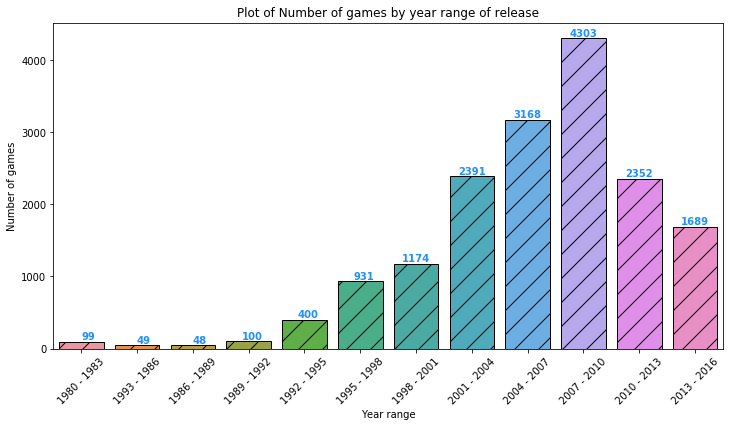

In [20]:
# plot of number of games by year range of release
bins = np.arange(games_data['year of release'].min(), games_data['year of release'].max()+1, 3)
bin_label = ['1980 - 1983', '1993 - 1986', '1986 - 1989', '1989 - 1992', '1992 - 1995', '1995 - 1998', '1998 - 2001', '2001 - 2004', '2004 - 2007', '2007 - 2010', '2010 - 2013', '2013 - 2016']
plot_bar = games_data.groupby(pd.cut(games_data['year of release'], bins=bins)).agg({'year of release': 'count'}).rename(columns={'year of release':'Number of games'})
plot_bar['Year range'] = bin_label
fig, ax=plt.subplots(figsize=(12,6))
ax = sns.barplot(x='Year range', y= 'Number of games', data = plot_bar, edgecolor='black', hatch='/')
ax.set_title('Plot of Number of games by year range of release', fontdict={'size':12})
ax.set_xticklabels(bin_label, rotation=45);
for i, v in enumerate(plot_bar.iloc[:,0].values):
    ax.text(i + 0.25, v + 3, str(v), color='dodgerblue', fontweight='bold', fontdict={'horizontalalignment':'right', 'verticalalignment':'bottom', 'size':10})


Conclusion: From the lollipop plot above, we can see that the years between 2005 and 2011 had the most games released. We then group years by range and try to see how significant some years may be. We use cut to define the bins and divide the years in two groups of three year intervals. We observed from the bar plot that the data for the period 2000 to 2016 was significant with year between 2007 and 2010 having the most significance in the data.

Look at how sales varied from platform to platform

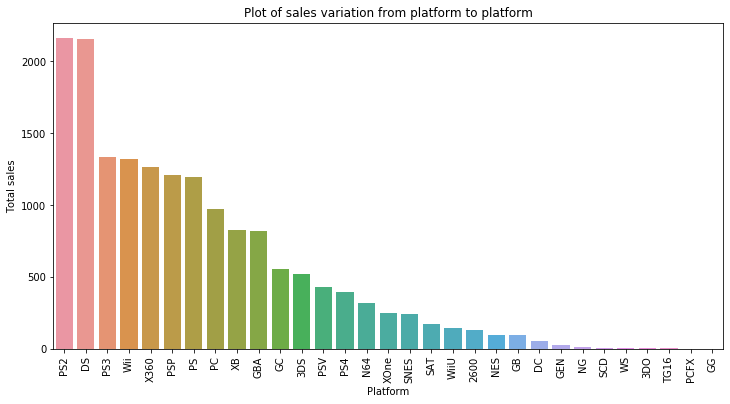

In [21]:
# plot of sales variation from platform to platform
plot_snsbar(games_data, 'platform', 'total sales', 'Plot of sales variation from platform to platform')

We can see from the plot above that there were sales variation across platform. The top five platforms were PS2, DS, PS3, Wii and X360 respectively. The platform with the least sales were SCD, WS, 3DO, TG16, PCFX, and GG. We can plot a distribution of total sales against year of release across each platform. This will give us an idea of popular platform and the duration for new platform to appear.

Choose the platforms with the greatest total sales and build a distribution based on data for each year

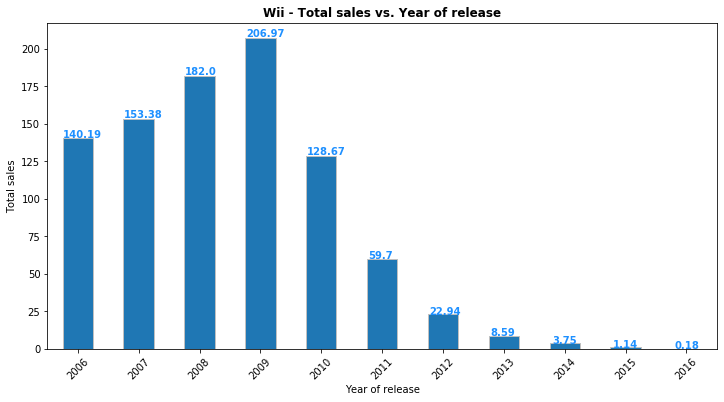

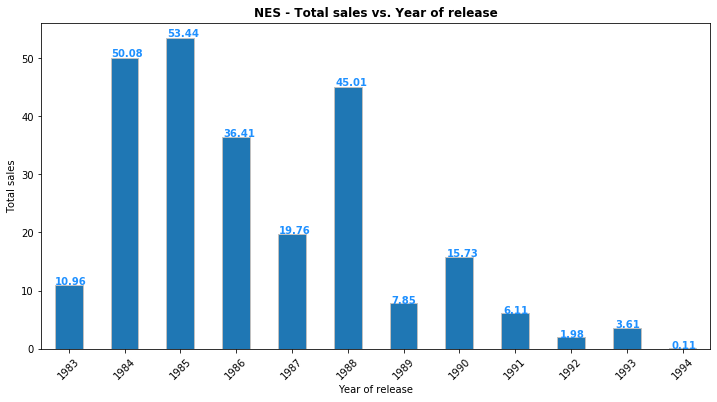

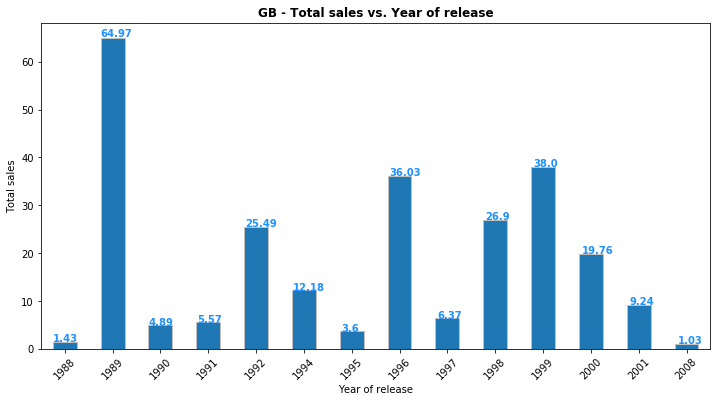

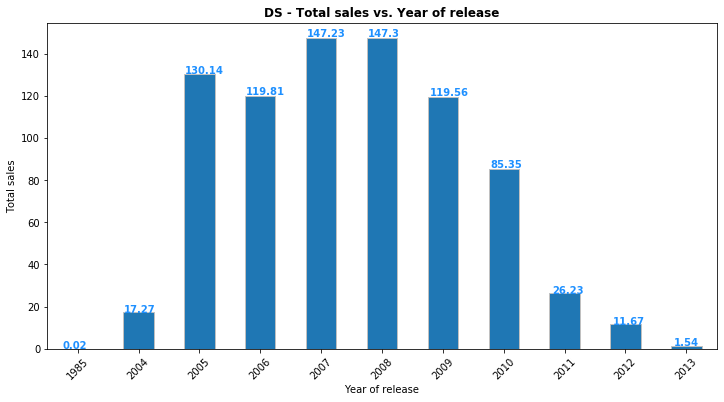

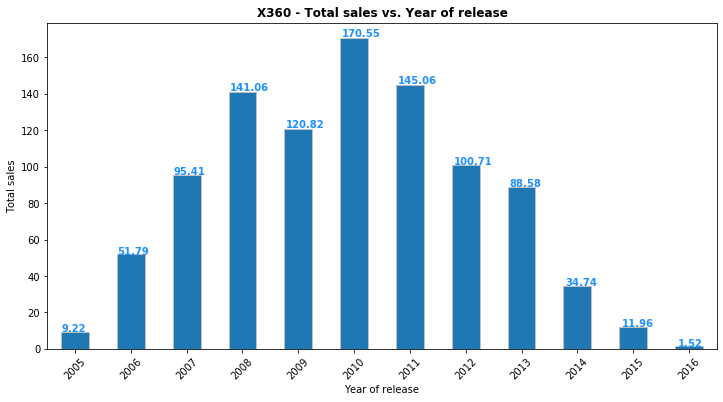

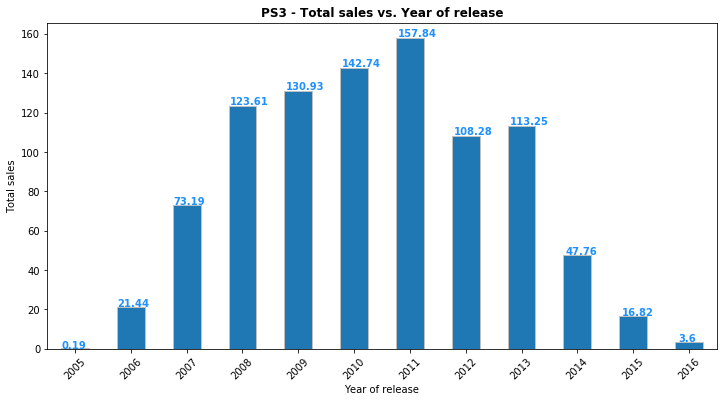

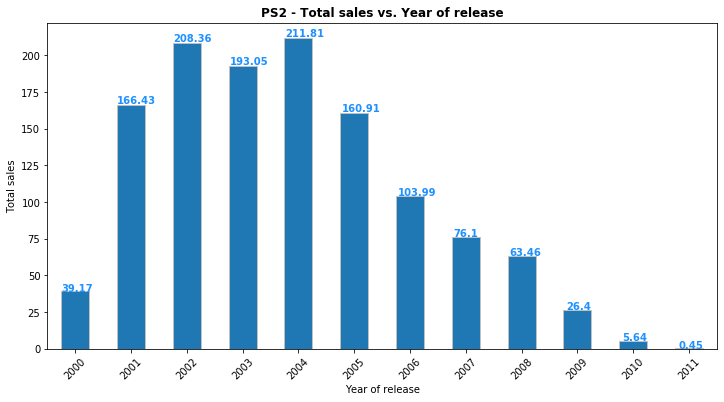

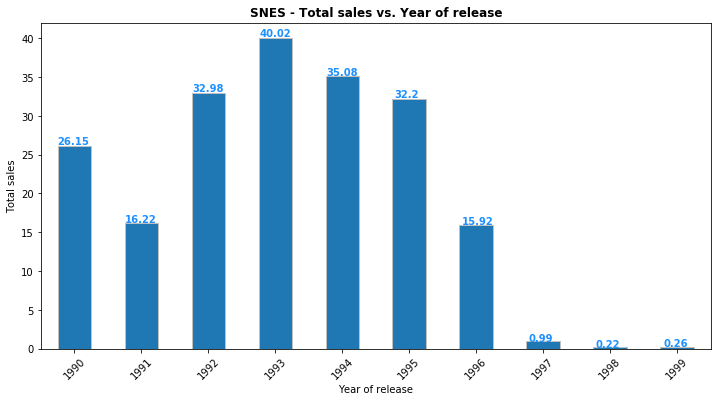

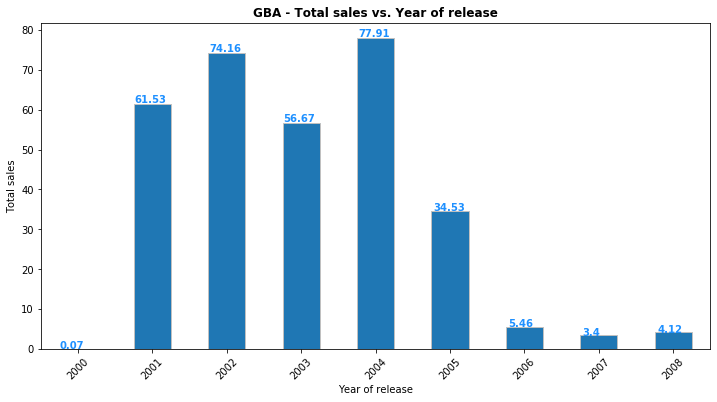

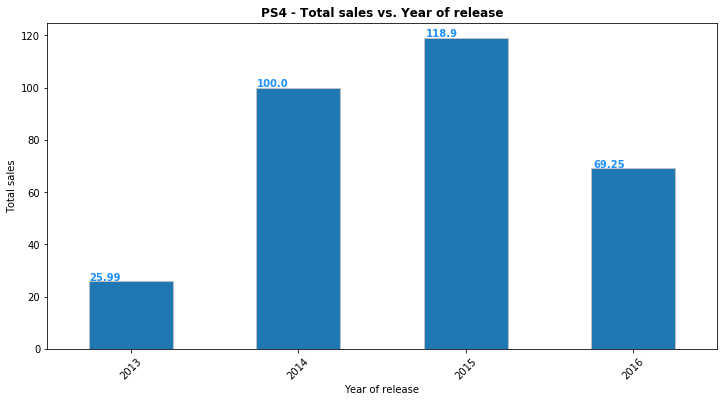

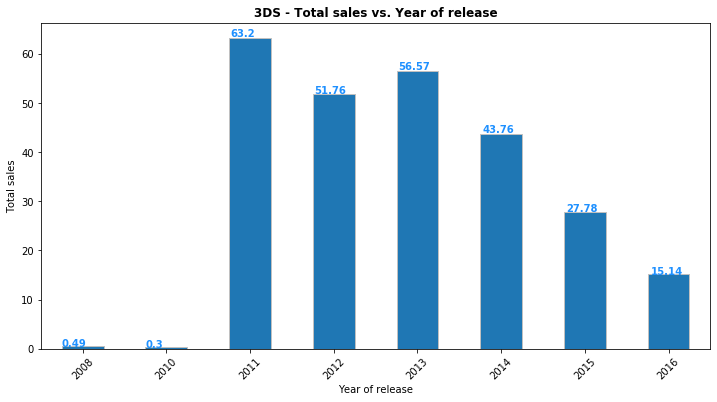

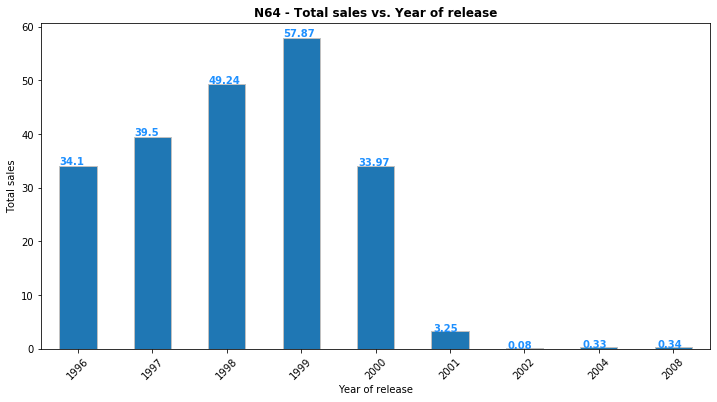

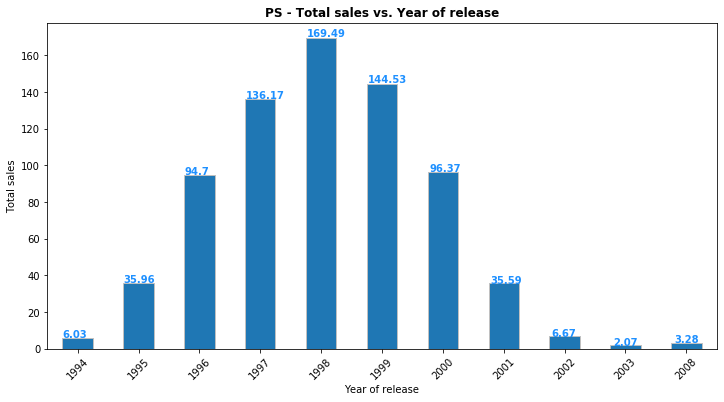

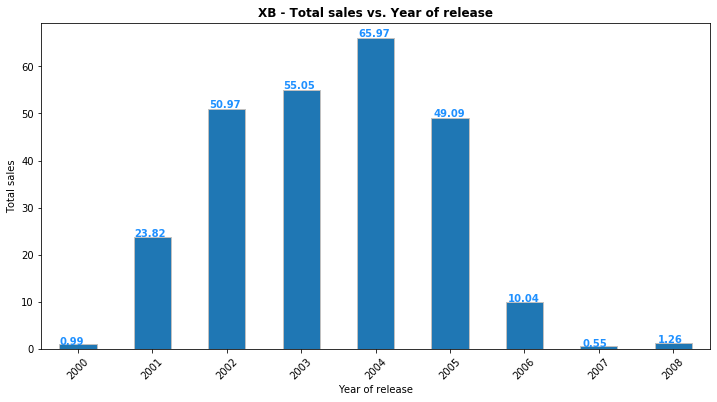

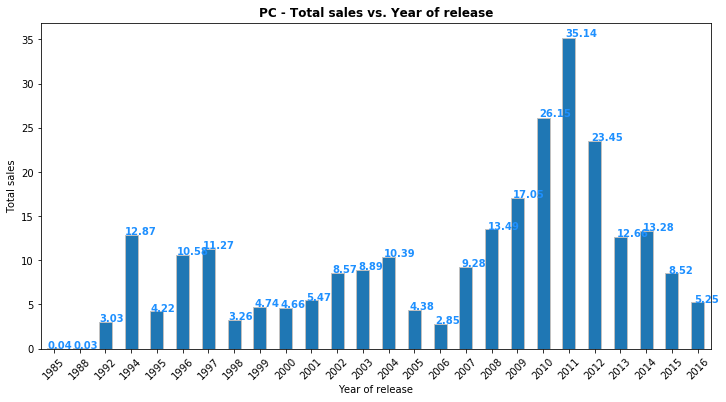

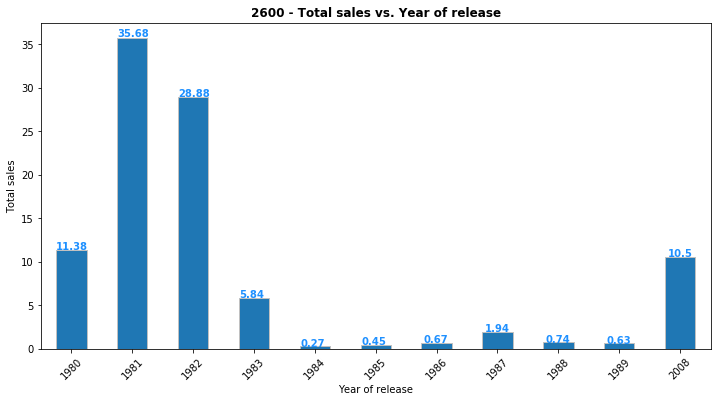

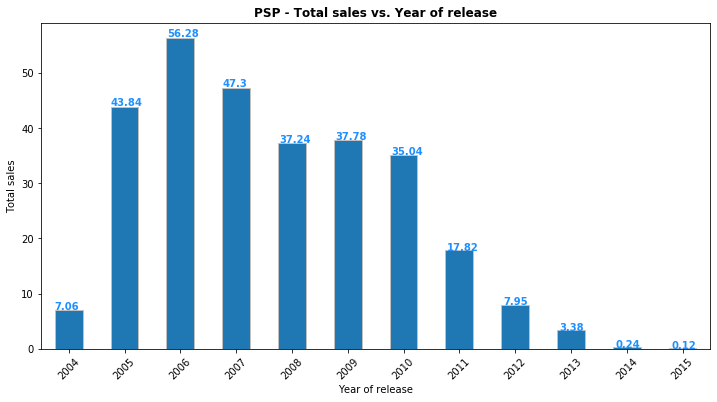

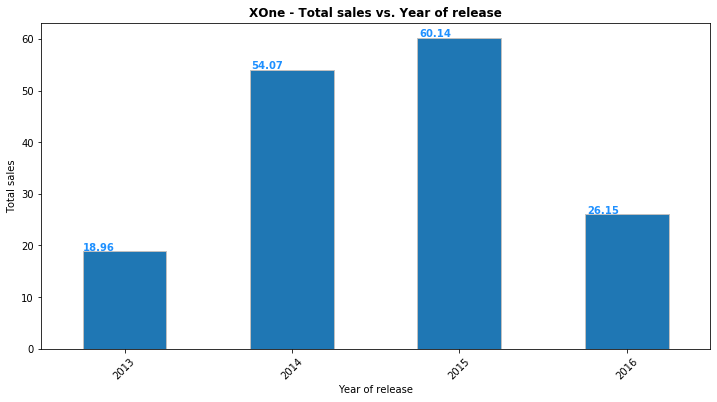

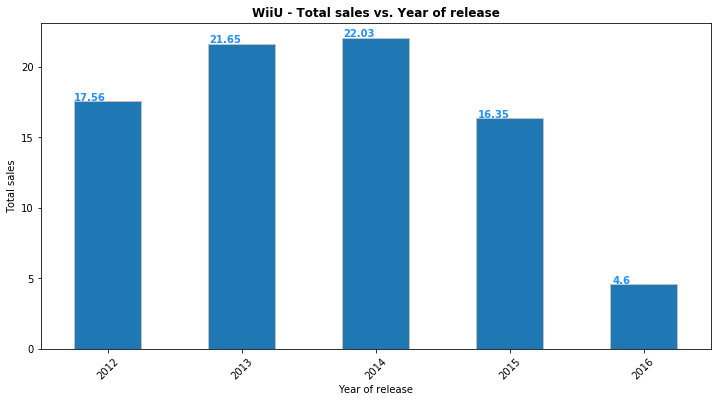

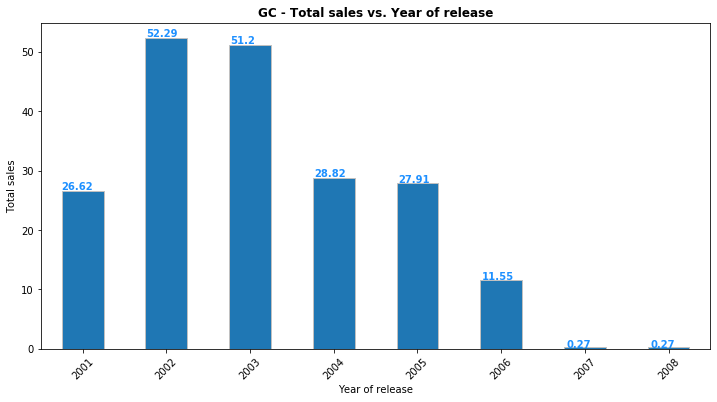

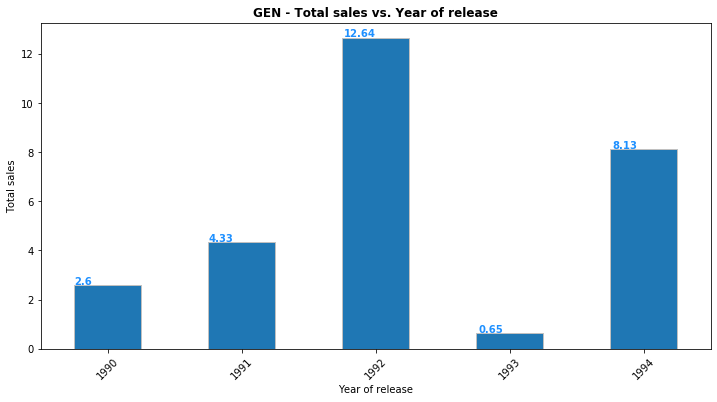

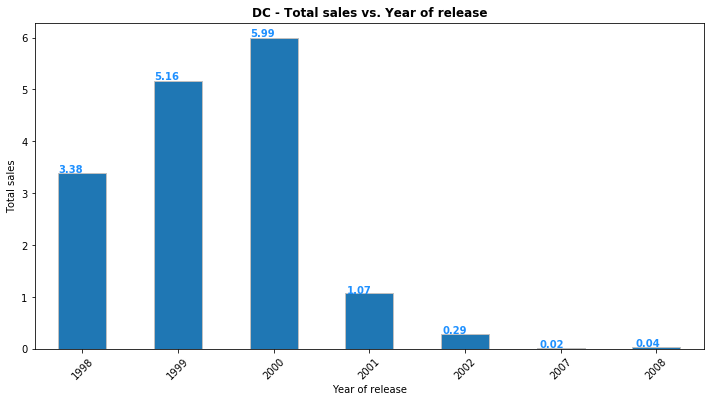

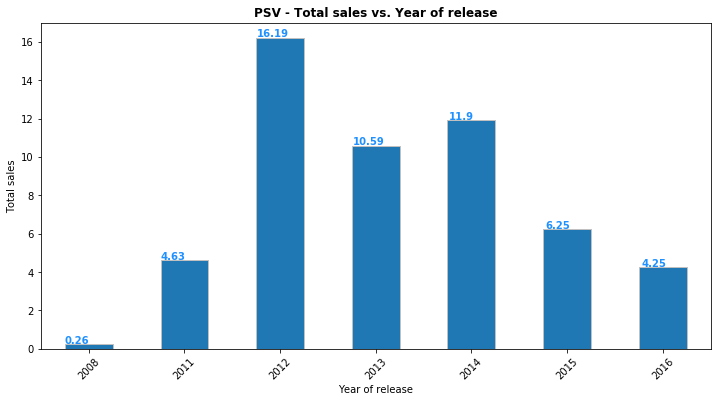

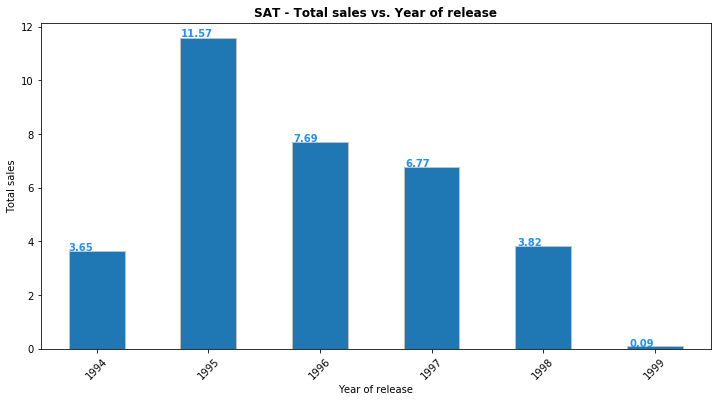

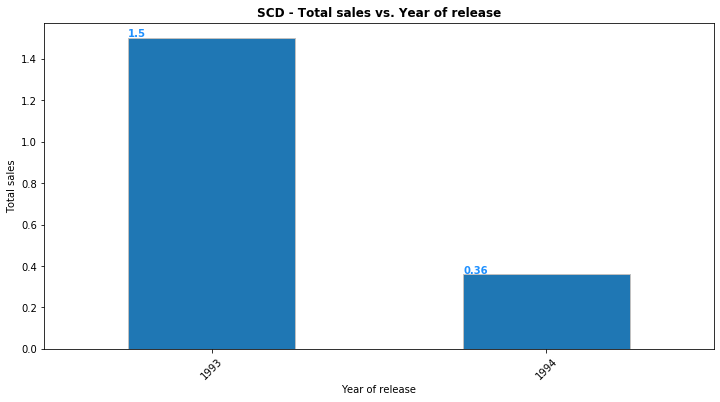

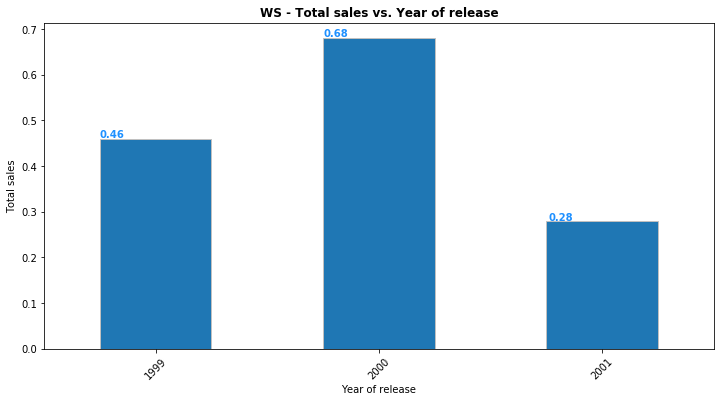

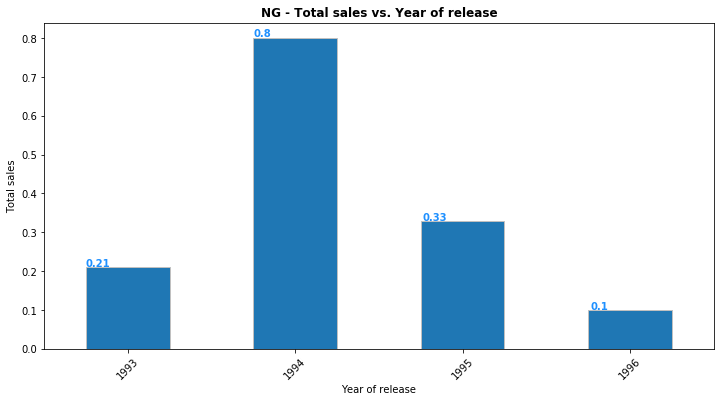

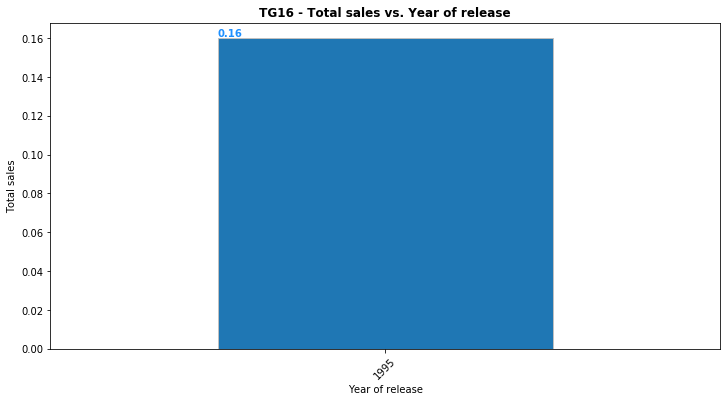

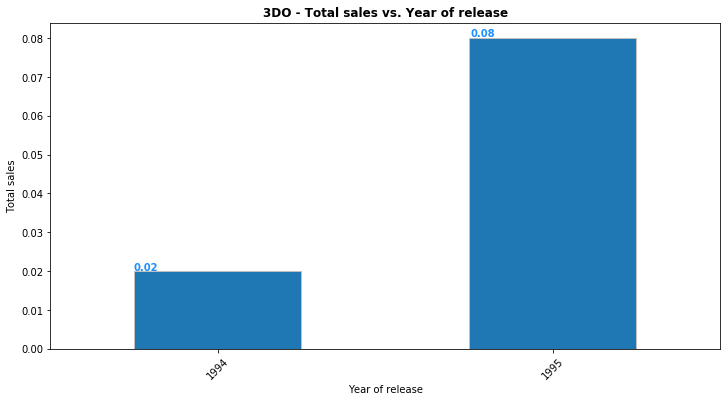

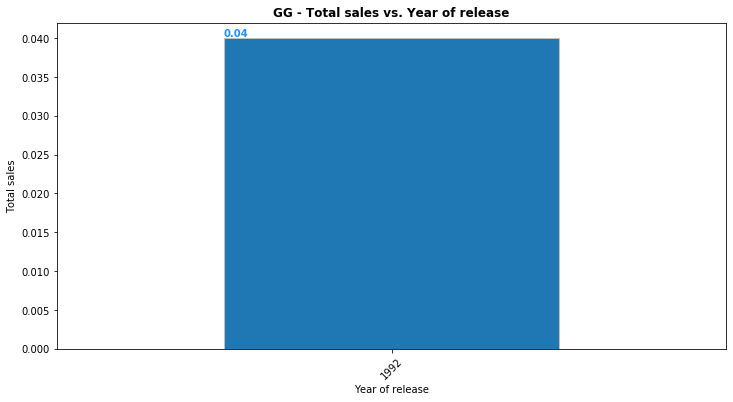

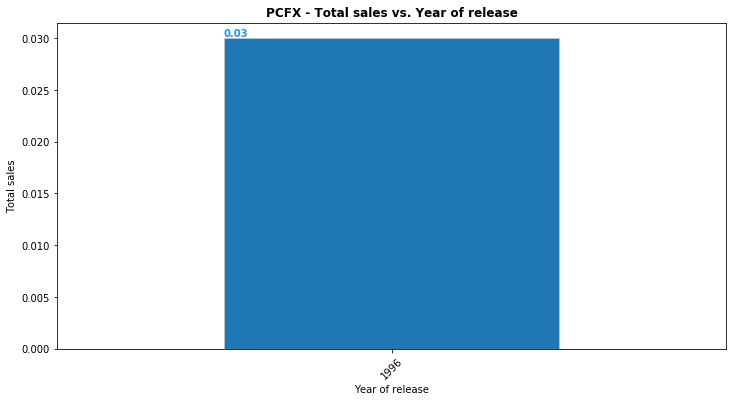

In [22]:
# distribution of total sales vs. year of release by each platform
for platform in df['platform'].unique():
    plot_distribution(df, 'year_of_release', 'total_sales', 'platform', platform)


The chart above is the distribution of total sales against the year of release for each platform. From the chart we can observe that:
- Wii was popular between 2006 and 2011. It's popularity has reduced since it now have zero sales.
- DS was popular between 2005 and 2010.
- X360 was popular between 2008 and 2011
- PS3 was popular between 2008 and 2013. Sales dropped sharply in 2016
- PS2 was popular between 2001 and 2007. Sales started dropping after 2007 which coincided with the emergence of PS3. PS2 used to be popular but now have zero sales.
- NES used to be popular between 1984 and 1988. It now has zero sales. Similarly, PSP was popular between 2005 and 2010. it now has zero sales.
- The PC had the highest sale in 2011. The PC is the platform with the longest lifespan among the other platform. The PC has been selling for about 30 years.
- It generally takes about 6 years for new platforms to appear and old ones to fade.

Find platforms that used to be popular but now have zero sales.

We can also visualize the platform that were popular but now have zero sales based on the z-score. We calculate the z-score and use a conditional approach to make sales z-score values less than 0 to be red. Other sales z-score values greater than 0, we make them green. We then plot a divergent plot showing the platform performance against the z-score.

In [23]:
# group the total sales by platform
platform_df = df[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
platform_df.head()

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42


In [24]:
# get the z-score and create different color for values less than zero
platform_df['sales_zscore'] = (platform_df['total_sales'] - platform_df['total_sales'].mean())/ platform_df['total_sales'].std()
platform_df['color'] = ['red' if x < 0 else 'green' for x in platform_df['sales_zscore']]
platform_df.tail()

,platform,total_sales,sales_zscore,color
26,DS,806.12,1.489273,green
27,Wii,907.51,1.780439,green
28,PS3,939.65,1.872737,green
29,X360,971.42,1.963972,green
30,PS2,1255.77,2.780554,green


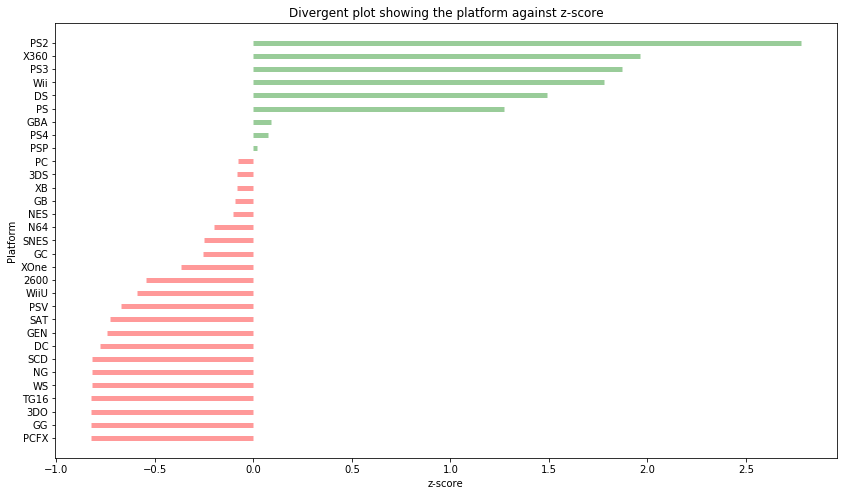

In [25]:
# divergent barplot showing the platform against z-score
plt.figure(figsize=(14, 8))
plt.hlines(y=platform_df.platform, xmin=0, xmax=platform_df.sales_zscore, color=platform_df.color, alpha=0.4, linewidth=5)
plt.xlabel('z-score') 
plt.ylabel('Platform') 
  
# displaying the title
plt.title('Divergent plot showing the platform against z-score');

The divergent plot above shows the plot of different platform. The platform with 'green' bar is the platform that is above the mean while the bars with 'red' bars is the platform below the mean. We can clearly see that PS2, X360, PS3, Wii, DS and PS are well above the mean. They are the leaders in term of total sales. The TG16, 3DO, GG, and PCFX are the worst platform in terms of total sales with values well below the mean of the data.

Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [26]:
# group `platform` and `total sales` by `platform`
tree_df = df[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
tree_df = tree_df[tree_df['total_sales'] > 10]
tree_df.head()

,platform,total_sales
7,DC,15.95
8,GEN,28.35
9,SAT,33.59
10,PSV,54.07
11,WiiU,82.19


In [27]:
# create labels for our tree map
tree_size = tree_df['total_sales'].values.tolist()
labels = tree_df.apply(lambda x: str(x[0])+'\n'+'$'+str(round(x[1])), axis=1)
labels.head()

7       DC\n$16
8      GEN\n$28
9      SAT\n$34
10     PSV\n$54
11    WiiU\n$82
dtype: object

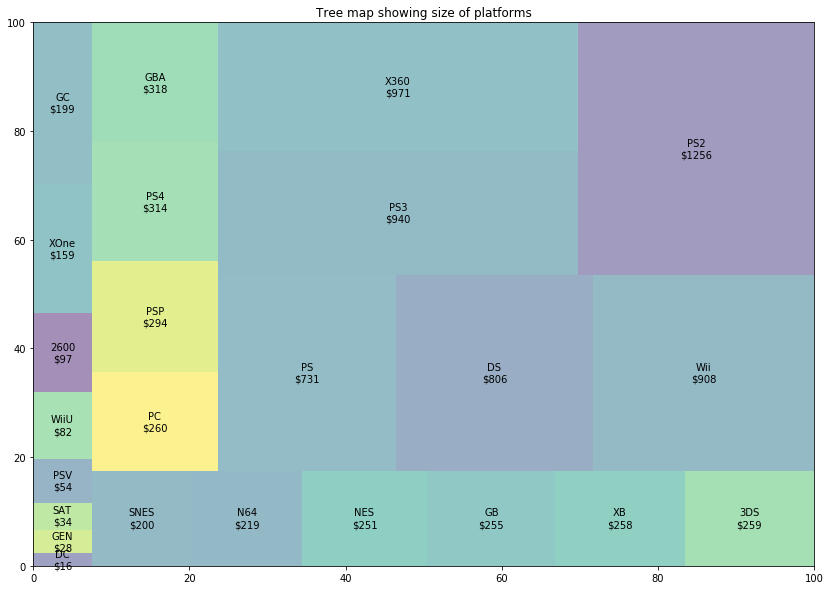

In [28]:
# tree map showing size of platforms
plt.figure(figsize=(14, 10))
plt.title('Tree map showing size of platforms')
squarify.plot(sizes=tree_size, label=labels, alpha=0.5);



The tree map is defined by the size of the tile, it's color and label. All the rectangles represents the scale of the platform leading or shrinking in sales. The values of sales for each platform is also included in the treemap. The size of the tile tells us which sales is growing or shrinking. The bigger rectangle represents platform that are leading in sales, while the smaller rectangle depicts platforms that are shrinking in sales. The plot above shows the distribution of our market, We can see from this chart that PS2, PS3, Wii, DS and X360 are the platform that is leading in sales. At a glance, we can tell which platform is profitable or not. We can drill down our analysis by choosing year 2014 as the year that is relevant to our analysis and disregard platforms and sales before then.

In [29]:
# new dataframe for year we've decided to be relevant.
new_data_ = df[df.year_of_release > 2012]
new_data_ = new_data_.reset_index(drop=True, inplace=False)
shift_sales_df = pd.pivot_table(new_data_, index='year_of_release', columns= 'platform', values='total_sales', aggfunc=sum, fill_value=0)
shift_sales_df.head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


We can determine the shift in sales by finding the sum of the total sales across platform for each year of release. The shift in sales will tell us how our platform have faired in terms of sales from the year 2014 till recent.

In [30]:
# calculate shift
shift_sales_df.shift(+1).head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2015,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2016,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


In [31]:
# calculate shift in sales
shift_in_sales = shift_sales_df - shift_sales_df.shift(+1)
shift_in_sales = shift_in_sales.dropna()
shift_in_sales.head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2014,-12.81,-1.54,0.62,-65.49,74.01,-3.14,1.31,-4.84,0.38,-53.84,35.11
2015,-15.98,0.00,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,0.00,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


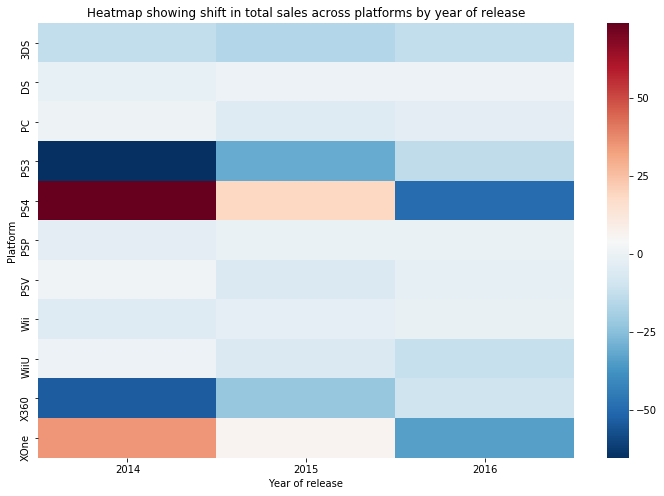

In [32]:
# plot heatmap using shift in sales data
plt.figure(figsize=(12,8))
sns.heatmap(shift_in_sales.T, cmap='RdBu_r')
plt.title('Heatmap showing shift in total sales across platforms by year of release')
plt.xlabel('Year of release')
plt.ylabel('Platform');


The heatmap above shows different platforms and the shift in sales across platforms. From the heatmap we can see that sales of the PS4 and XOne was very successful in 2014.

Build a box plot for the global sales of all games, broken down by platform

In [33]:
# create grouped data for total sales from year 2014
new_data = df[df.year_of_release > 2013]
new_data = new_data.reset_index(drop=True, inplace=False)
grouped = new_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
grouped

,platform,year_of_release,total_sales
0,3DS,2014,43.76
1,3DS,2015,27.78
2,3DS,2016,15.14
3,PC,2014,13.28
4,PC,2015,8.52
5,PC,2016,5.25
6,PS3,2014,47.76
7,PS3,2015,16.82
8,PS3,2016,3.60
9,PS4,2014,100.00


In [34]:
# create an ordered list for our grouped data
ordered = grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
ordered

0     PSP
1     Wii
2     PSV
3      PC
4    WiiU
5    X360
6     PS3
7     3DS
8    XOne
9     PS4
Name: platform, dtype: object

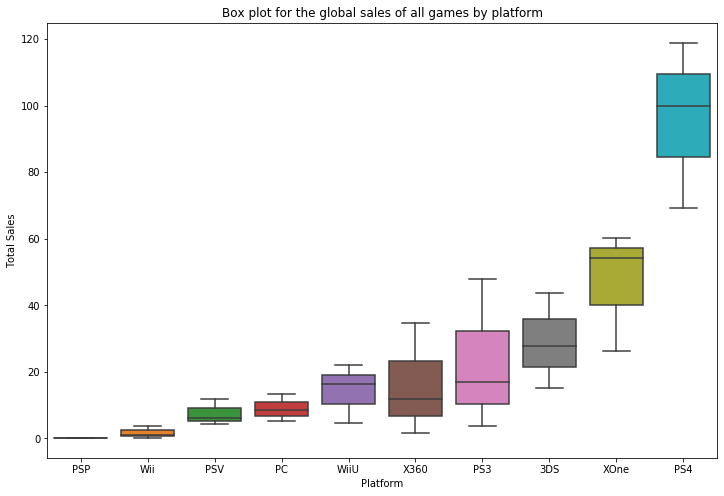

In [35]:
# Box plot for global sales of all games by platform
plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data=grouped, order=ordered)
plt.title('Box plot for the global sales of all games by platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales');

The ordered list is an array of platforms from least profitable to most profitable. We use this ordered list to plot a boxplot for easy comparison. We can see that the PS4 platform have a higher mean over the year than other platform. We can also observe that the differences in sales are also significant. In general, we can conclude that the playstation have more sales than any other platform. We can plot a box plot showing average sales on various platform.



What about average sales on various platforms?


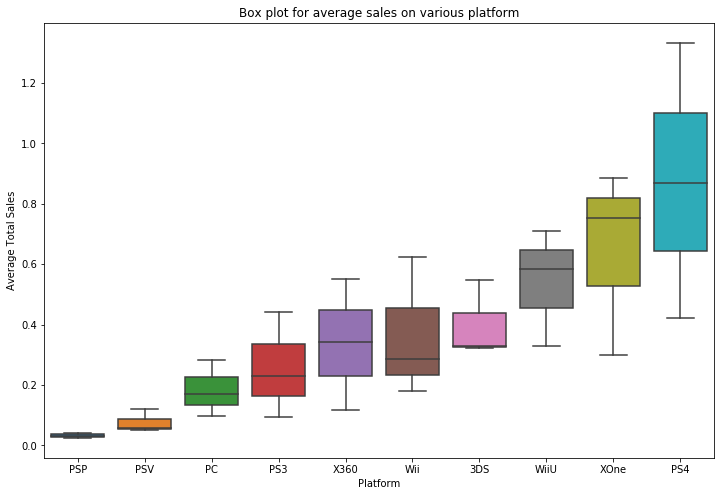

In [36]:
# box plot for average sales on various platform
plot_box(new_data, 'platform', 'total_sales', 'Average Total Sales', 'Box plot for average sales on various platform', np.mean)


From the box plot for average sales on various platform, we can see that PS4 has the highest average sales across the various platforms. PS4 is also the most profitable platform since more sales were made in PS4 based on the average sales than other platform.

Take a look at how user and professional reviews affect sales for one popular platform (you choose).

The following functions will be useful in this section

In [37]:
# determining correlation
def platform_corr(df, platform):
    df_platform = df[df.platform == platform].reset_index()[['critic_score', 'user_score', 'total_sales']]
    return df_platform.corr()

# plot of correlation Matrix
def corrMatrix(df, platform):
    df_platform = df[df.platform == platform].reset_index()[['critic_score', 'user_score', 'total_sales']]
    plt.figure(figsize=(8, 6))
    corrMatrix = df_platform.corr()
    sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Plot for ' + str(platform) + ' platform')
    plt.show();
    
# calculating the pearson correlation among variables
def pearson_coeff(df, x, y, platform):
    df_platform = df[df.platform == platform].reset_index()[['critic_score', 'user_score', 'total_sales']]
    pearson_coef, p_value = st.pearsonr(df_platform[x], df_platform[y])
    print("The Pearson Correlation Coefficient is {:.3f},".format(pearson_coef), "with a p-value of {:.3f}".format(p_value))
    print()
    print("\033[1m" + 'Conclusion:' + "\033[0m")
    if (p_value < 0.001) and (pearson_coef < 0.5):
        print("Since the p-value is < 0.001, there is strong evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.001) and (pearson_coef < 0.7):
        print("Since the p-value is < 0.001, there is strong evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.001) and (pearson_coef > 0.7):
        print("Since the p-value is < 0.001, there is strong evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")") 
    elif (p_value < 0.05) and (pearson_coef < 0.5):
        print("Since the p-value is < 0.05, there is moderate evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.05) and (pearson_coef < 0.7):
        print("Since the p-value is < 0.05, there is moderate evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.05) and (pearson_coef > 0.7):
        print("Since the p-value is < 0.05, there is moderate evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef < 0.5):
        print("Since the p-value is < 0.1, there is weak evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef < 0.7):
        print("Since the p-value is < 0.1, there is weak evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef > 0.7):
        print("Since the p-value is < 0.1, there is weak evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")    
    elif (p_value > 0.1):
        print("Since the p-value is > 0.1, there is no evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant")

# calculating the pearson correlation for reviews against sales
def pearson_review_coeff(df, x, y, platform):
    df_platform = df[df.platform == platform].reset_index()[['review_score', 'total_sales']]
    pearson_coef, p_value = st.pearsonr(df_platform[x], df_platform[y])
    print("The Pearson Correlation Coefficient is {:.3f},".format(pearson_coef), "with a p-value of {:.3f}".format(p_value))
    print()
    print("\033[1m" + 'Conclusion:' + "\033[0m")
    if (p_value < 0.001) and (pearson_coef < 0.5):
        print("Since the p-value is < 0.001, there is strong evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.001) and (pearson_coef < 0.7):
        print("Since the p-value is < 0.001, there is strong evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.001) and (pearson_coef > 0.7):
        print("Since the p-value is < 0.001, there is strong evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")") 
    elif (p_value < 0.05) and (pearson_coef < 0.5):
        print("Since the p-value is < 0.05, there is moderate evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.05) and (pearson_coef < 0.7):
        print("Since the p-value is < 0.05, there is moderate evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.05) and (pearson_coef > 0.7):
        print("Since the p-value is < 0.05, there is moderate evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef < 0.5):
        print("Since the p-value is < 0.1, there is weak evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef < 0.7):
        print("Since the p-value is < 0.1, there is weak evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef > 0.7):
        print("Since the p-value is < 0.1, there is weak evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")    
    elif (p_value > 0.1):
        print("Since the p-value is > 0.1, there is no evidence that the correlation between " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant")

# scatter between `professional review` and `total sales` for `platform`
def plot_sns_scatter(df, x, y, platform):
    df_platform = df[df.platform == platform].reset_index()[[x, y]]
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x, y=y, data=df_platform)
    plt.title('Scatter plot for correlation between ' + str(x.replace('_', ' ').capitalize()) + \
              ' and ' + str(y.replace('_', ' ').capitalize()) + ' for ' + str(platform))
    plt.xlabel(str(x.replace('_', ' ').capitalize()))
    plt.ylabel(str(y.replace('_', ' ').capitalize()));

For this section, we will look at how user and professional reviews affect sales in PS4, PS3, XOne, 3DS and X360. We start by first checking the correlation for PS4 platform with critic score, user score and total sales.

PS4 platform

In [38]:
# correlation for PS4 platform with critic score, user score and total sales
platform_corr(new_data, 'PS4')

,critic_score,user_score,total_sales
critic_score,1.000000,0.37613,0.267533
user_score,0.376130,1.00000,0.008750
total_sales,0.267533,0.00875,1.000000


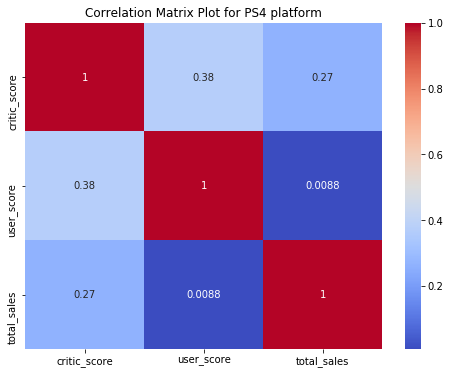

In [39]:
# plot the correlation matrix
corrMatrix(new_data, 'PS4')

In [40]:
# determine the pearson correlation between `user review` and `total sales` for `PS4`
pearson_coeff(new_data, 'user_score', 'total_sales', 'PS4')

The Pearson Correlation Coefficient is 0.009, with a p-value of 0.866

Conclusion:
Since the p-value is > 0.1, there is no evidence that the correlation between User score and Total sales is statistically significant


In [41]:
# determine the pearson correlation between `professional review` and `total sales` for `PS4`
pearson_coeff(new_data, 'critic_score', 'total_sales', 'PS4')

The Pearson Correlation Coefficient is 0.268, with a p-value of 0.000

Conclusion:
Since the p-value is < 0.001, there is strong evidence that the correlation between Critic score and Total sales is statistically significant, although the linear relationship isn't extremely strong (≈0.268)



We can see from the pearson coefficient that the correlation between Critic score and Total sales is statistically significant for the PS4 platform. What if we sum the two review and recheck our analysis? Will we arrive at the same conclusion?


In [42]:
# sum of reviews
new_data['review_score'] = new_data[['critic_score', 'user_score']].apply(lambda x: (x[0] + x[1]*10)/2, axis=1)
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,review_score
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,79,6.0,T,14.63,69.5
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,90.0
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,26,6.1,E,11.68,43.5
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,62.5
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,79,6.0,T,7.98,69.5


In [43]:
# calculating the pearson correlation among variables
pearson_review_coeff(new_data, 'review_score', 'total_sales', 'PS4')

The Pearson Correlation Coefficient is 0.155, with a p-value of 0.003

Conclusion:
Since the p-value is < 0.05, there is moderate evidence that the correlation between Review score and Total sales is statistically significant, although the linear relationship isn't extremely strong (≈0.155)


Clearly the correlation between reviews and sales is statistically significant. We can plot scatter plot for reviews vs. sales for PS4.


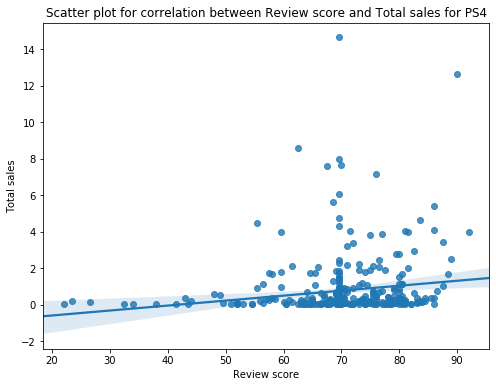

In [44]:
# scatter between `professional review` and `total sales` for `PS4`
plot_sns_scatter(new_data, 'review_score', 'total_sales', 'PS4')


In [45]:
# correlation of review score and total sales
new_data[new_data.platform == 'PS4'][['review_score', 'total_sales']].corr()

,review_score,total_sales
review_score,1.000000,0.154643
total_sales,0.154643,1.000000



From the scatter plot, we can observe that professional review has some significance with total sales. We can compare the sales of other top platform to make a comparative analysis.

PS3 platform

In [46]:
# calculating the pearson correlation among variables
pearson_review_coeff(new_data, 'review_score', 'total_sales', 'PS3')

The Pearson Correlation Coefficient is -0.186, with a p-value of 0.006

Conclusion:
Since the p-value is < 0.05, there is moderate evidence that the correlation between Review score and Total sales is statistically significant, although the linear relationship isn't extremely strong (≈0.186)


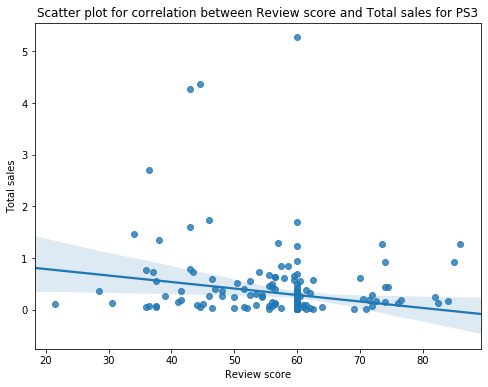

In [47]:
# scatter between `professional review` and `total sales` for `PS3`
plot_sns_scatter(new_data, 'review_score', 'total_sales', 'PS3')

For the PS3 platform, the correlation between Review score and Total sales is statistically significant. This means that there is moderate evidence to conclude there is a significant linear relationship between professional review and Total sales because the correlation coefficient is significantly different from zero. What this means is that there is a significant linear relationship between Review score and Total sales.

3DS platform

In [48]:
# calculating the pearson correlation among variables
pearson_review_coeff(new_data, 'review_score', 'total_sales', '3DS')

The Pearson Correlation Coefficient is 0.073, with a p-value of 0.288

Conclusion:
Since the p-value is > 0.1, there is no evidence that the correlation between Review score and Total sales is statistically significant


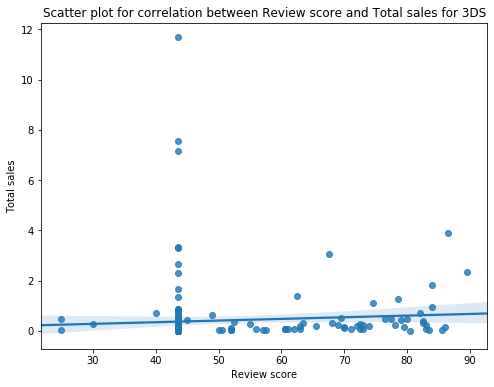

In [49]:
# scatter between `professional review` and `total sales` for `3DS`
plot_sns_scatter(new_data, 'review_score', 'total_sales', '3DS')


Since the test concludes that there is no evidence that the correlation between Review score and Total sales is statistically significant, it means that there is no significant linear relationship between Review score and Total sales.

XOne platform

In [50]:
# calculating the pearson correlation among variables
pearson_review_coeff(new_data, 'review_score', 'total_sales', 'XOne')

The Pearson Correlation Coefficient is 0.128, with a p-value of 0.053

Conclusion:
Since the p-value is < 0.1, there is weak evidence that the correlation between Review score and Total sales is statistically significant, although the linear relationship isn't extremely strong (≈0.128)


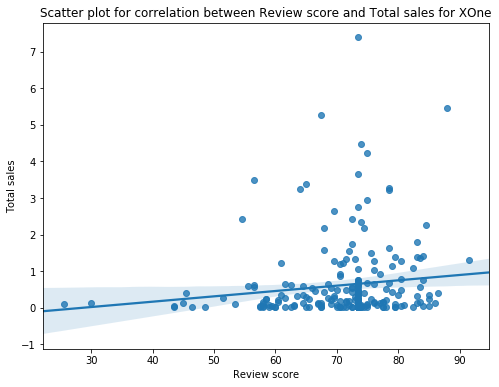

In [51]:
# scatter between `professional review` and `total sales` for `XOne`
plot_sns_scatter(new_data, 'review_score', 'total_sales', 'XOne')

Since the test concludes that the correlation between the two variables is significant, then there is sufficient evidence to conclude that there is a significant linear relationship between Review score and Total sales. This means that there is a significant linear relationship between Review score and Total sales.

X360 platform

In [52]:
# calculating the pearson correlation among variables
pearson_review_coeff(new_data, 'review_score', 'total_sales', 'X360')

The Pearson Correlation Coefficient is -0.135, with a p-value of 0.157

Conclusion:
Since the p-value is > 0.1, there is no evidence that the correlation between Review score and Total sales is statistically significant


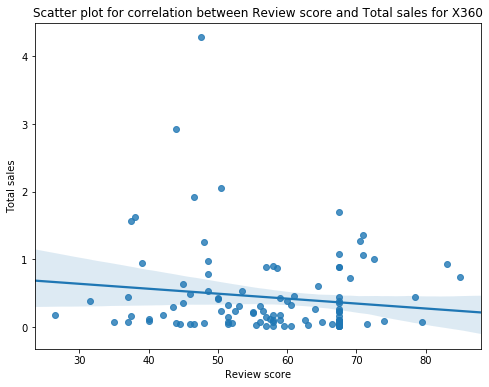

In [53]:
# scatter between `professional review` and `total sales` for `X360`
plot_sns_scatter(new_data, 'review_score', 'total_sales', 'X360')

For the X360 platform, since the test concludes that there is no evidence that the correlation between Review score and Total sales is statistically significant, it means that there is no significant linear relationship between Review score and Total sales.

Conclusion: We computed p-value and determined that in the X360 and 3DS platform, there is no evidence to show that a significant linear relationship exists between Review score and Total sales. For the other top products (PS4, XOne and PS3), there is evidence to show that linear relationship exists between Review score and Total sales. Hence we can say that user and professional reviews affects the total sales in PS4, XOne and PS3.

Take a look at the general distribution of games by genre


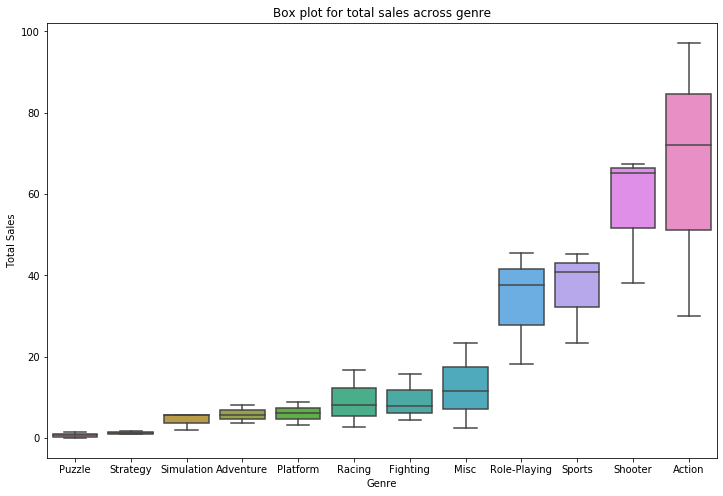

In [54]:
# box plot for total sales across genres
plot_box(new_data, 'genre', 'total_sales', 'Total Sales', 'Box plot for total sales across genre', np.sum)


From the box plot, we can see that the most profitable genres is the Action, Sports and Shooter genre. The least profitable genre is the Strategy genre. Also, from the plot, the Misc bought in more money even though it has a lower mean. To generalize about genre, we have to take the average total sales across genres.

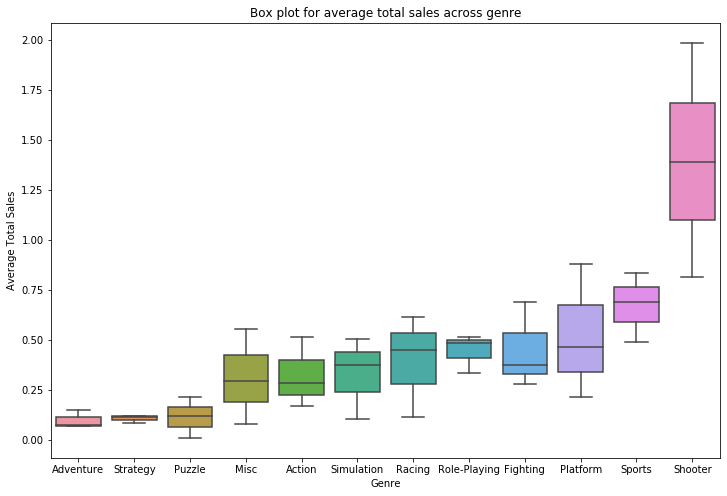

In [55]:
# box plot for average total sales across genres
plot_box(new_data, 'genre', 'total_sales', 'Average Total Sales', 'Box plot for average total sales across genre', np.mean)

Looking at the box plot for the average total sales across genre, we can conclude that the Adventure and Strategy genres are still the least profitable genres. Also, the Shooter and Sports genres are the most profitable genres abross the platform.

# Conclusion

We investigated how many games were released in different years and observed that more games were released in the years 2001 to 2016. Most games were released between years 2005 and 2011. The year with the highest number of games released was 2008. We determined from analysis that the period 2000 to 2016 was significant with year between 2007 and 2010 having the most significance in the data. The analysis of sales variation across platforms shows that the top five platforms in terms of total sales were PS, DS, PS3, Wii and X360 respectively. The platform with the least sales were SCD, WS, 3DO, TG16, PCFX, and GG. We also determined that the PC had the highest sale in 2011. The PC is the platform with the longest lifespan among the other platform selling for about 30 years. It generally takes about 6 years for new platforms to appear and old ones to fade.

We determined that PS4, PS3, XOne, 3DS and X360 are the platform that is leading in sales. This makes them the most profitable platforms. The TG16, 3DO, GG, and PCFX are the worst platform in terms of total sales with values well below the mean of the data. We looked at how user and professional reviews affect sales for one popular platform from year 2014. We concluded after computing the p-value and analyzing the statistics that there is a significant linear relationship between user and professional reviews and Total sales for the top products. Hence, user review affects the total sales.

# Part 4 : Create a user profile for each region

Top five platforms

We can determine the total sales by platform in each region and plot a pie chart to visualize the top five platforms


Region NA

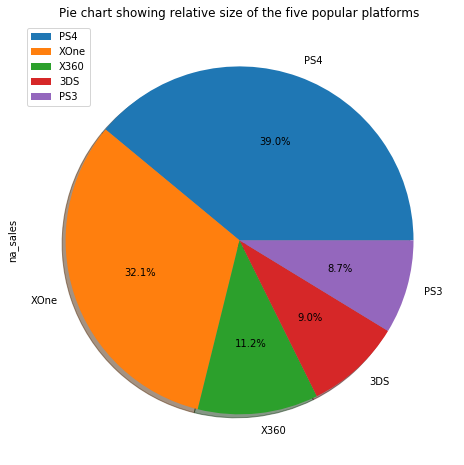

In [56]:
# get region NA data
new_data_region = new_data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
top_5_platforms = new_data_region.head()
(top_5_platforms.set_index('platform')
                .plot(y='na_sales', kind='pie', 
                      title = 'Pie chart showing relative size of the five popular platforms', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

The platform with the most market share in the NA region is PS4 with 39% while PS3 has the least market share of 8.7%

Region EU

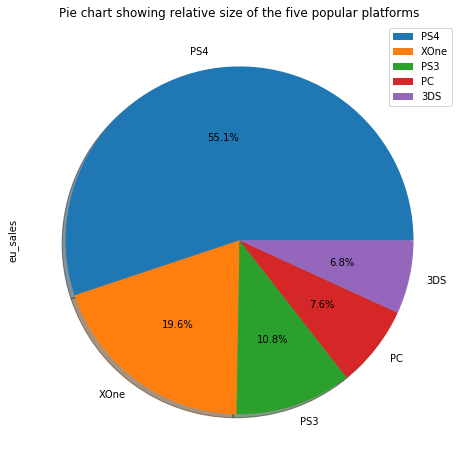

In [57]:
# get region EU data
new_data_region = new_data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
top_5_platforms = new_data_region.head()
(top_5_platforms.set_index('platform')
                .plot(y='eu_sales', kind='pie', 
                      title = 'Pie chart showing relative size of the five popular platforms', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

The platform with the most market share in the EU region is PS4 with 55.1% while 3DS has the least market share of 6.8%


Region JP

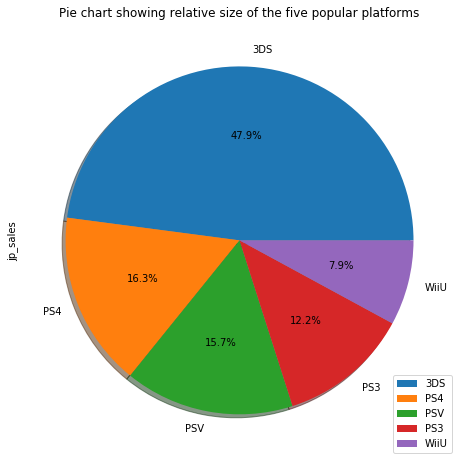

In [58]:
# get region JP data
new_data_region = new_data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_5_platforms = new_data_region.head()
(top_5_platforms.set_index('platform')
                .plot(y='jp_sales', kind='pie', 
                      title = 'Pie chart showing relative size of the five popular platforms', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

The platform with the most market share in the JP region is 3DS with 47.9% while WiiU has the least market share of 7.9%

Conclusion: We observe several variations in the market shares across the top five platforms from region to region. In the NA region, PS4 has the most market share. In the EU region, PS4 has the most market share. PS4 is a product of PlayStation made by Sony Interactive. It is probable that people in the EU region love the PS4 platform for one reason or another. In the JP region, the 3DS is king. Ofcourse people in the JP region would love the anime-like games on the 3DS which appeals to them than the other platforms.


Top five genres

Region NA

In [59]:
# get genre NA data
new_data_genre = new_data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
top_5_genre_na = new_data_genre.head()
top_5_genre_na.reset_index(drop=True)

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


Region EU

In [60]:
# get genre EU data
new_data_genre = new_data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
top_5_genre_eu = new_data_genre.head()
top_5_genre_eu.reset_index(drop=True)

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


Region JP

In [61]:
# get genre JP data
new_data_genre = new_data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_5_genre_jp = new_data_genre.head()
top_5_genre_jp.reset_index(drop=True)

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


The NA region and EU region are pretty similar. The major difference between those two region is the presence of Misc genre in the NA market against Racing in the EU market. The JP region is different from the other regions because it has the Fighting genre which is absent in both EU and NA regions, and the Misc genre which is absent in the EU region.


Do ESRB ratings affect sales in individual regions?

Region NA

In [62]:
# get NA's ESRB ratings
new_data_ratings_na = new_data.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
new_data_ratings_na = new_data_ratings_na.reset_index(drop=True)
new_data_ratings_na

,rating,na_sales
0,M,100.29
1,E,83.61
2,T,62.80
3,E10+,37.05
4,RP,0.31


Region EU

In [63]:
# get EU's ESRB ratings
new_data_ratings_eu = new_data.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
new_data_ratings_eu = new_data_ratings_eu.reset_index(drop=True)
new_data_ratings_eu

,rating,eu_sales
0,M,95.39
1,E,81.15
2,T,62.64
3,E10+,28.30
4,RP,3.20


Region JP

In [64]:
# get JP's ESRB ratings
new_data_ratings_jp = new_data.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
new_data_ratings_jp = new_data_ratings_jp.reset_index(drop=True)
new_data_ratings_jp

,rating,jp_sales
0,E,48.33
1,T,30.39
2,M,9.54
3,E10+,4.83
4,RP,0.00


Looking at the result, ESRB rating does affect sales in individual regions. In each of the three regions, rating E, T, M, and E10+ got the highest sales. In all three regions, rating RP, AO and EC got the lowest sales.

Conclusion

We observe several variations in the market shares across the top five platforms from region to region. In the NA region, PS4 has the most market share. In the EU region, PS4 has the most market share. In the JP region, the 3DS has the most market share. The NA region and EU region are pretty similar. The major difference between those two region is the presence of Misc genre in the NA market against Racing in the EU market. The JP region is different from the other regions because it has the Fighting genre which is absent in both EU and NA regions, and the Misc genre which is absent in the EU region. Looking at the ratings of the regions, we discovered that ESRB rating does affect sales in individual regions. In each of the three regions, rating E, T, M, and E10+ got the highest sales.

# Part 5 : Test the hypothesis




We use the following function for testing the hypothesis.

In [65]:
# function for hypothesis testing
def hypothesis_test(variable1, variable2, alpha):
    # set critical statistical significance level
    alpha = alpha
    # test the hypothesis that the means of the two independent population are equal
    results = st.ttest_ind(variable1, variable2, equal_var = False)
    print('The p-value is: {}'.format(results.pvalue))

    # compare the p-value with the significance level
    if (results.pvalue < alpha):
        print('We reject the null hypohesis')
    else:
        print('We fail to reject the null hypothesis')

Test 1 - Average user ratings of the Xbox One and PC platforms are the sam

In [66]:
# calculation of average user ratings
xbox1 = new_data[new_data.platform == 'XOne']['user_score']
pc = new_data[new_data.platform == 'PC']['user_score']

# mean value determination
xbox1_avg = new_data[new_data.platform == 'XOne']['user_score'].mean()
pc_avg = new_data[new_data.platform == 'PC']['user_score'].mean()
print('The average user rating for the Xbox is {:.3f}'.format(xbox1_avg) + ' and ' + \
      'the average user rating for the PC is {:.3f}'.format(pc_avg))


The average user rating for the Xbox is 6.707 and the average user rating for the PC is 6.203



Null Hypothesis: There is no difference between the average user ratings of the Xbox One and PC platforms.

We calculated the average user rating for the Xbox, and the average user rating of the PC platform. We want to know whether the difference between these numbers are significant? That depends on the variance of the samples the values are calculated from. Instead of basing our comparison on the mean alone, we use the data to perform a statistical test. In this experiment, the null hypothesis is that there is no difference between the average user ratings of the Xbox One and PC platforms. The alternative hypothesis is that the average user ratings of the Xbox One and PC platforms differs. We can carry out hypothesis testing to test the hypothesis. We use a significance level (or alpha) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another.
- $H_0$ (null hypothesis): average user ratings of the Xbox One = average user ratings of the PC platforms
- $H_1$ (alternative hypothesis): average user ratings of the Xbox One <> average user ratings of the PC platforms
- $\alpha$ = 0.05
- If p-value < $\alpha$, there is a statistically significant difference and we reject the null hypothesis. If p-value > $\alpha$, no statistically significant difference and we fail to reject null hypothesis.


In [67]:
# hypothesis testing
hypothesis_test(xbox1, pc, 0.05)

The p-value is: 0.000762647629171805
We reject the null hypohesis


Conclusion

We formulated the null hypothesis by stating that there is no difference between the average user ratings of the Xbox One and PC platforms. We used a significance level of 0.05. Since the p-value is greater than $\alpha$ = 0.05, we fail to reject the null hypothesis. The evidence suggests that there is no statistically significant difference between the average user ratings of the Xbox One and PC platforms .i.e., the average user ratings of the Xbox One and the average user ratings of the PC platforms are the same.


Test 2 - Average user ratings for the Action and Sports genres are different

In [68]:
# calculate the average user rating in the Action and Sports genre
action = new_data[new_data.genre == 'Action']['user_score']
sports = new_data[new_data.genre == 'Sports']['user_score']

# mean value determination
action_avg = new_data[new_data.genre == 'Action']['user_score'].mean()
sports_avg = new_data[new_data.genre == 'Sports']['user_score'].mean()
print('The average user rating for the action genre is {:.3f}'.format(action_avg) + ' and ' + \
      'the average user rating for the sports genre is {:.3f}'.format(sports_avg))

The average user rating for the action genre is 6.304 and the average user rating for the sports genre is 5.509


Null Hypothesis: The average user ratings for the Action and Sports genres differs

We calculated the average user rating for the Action genre, and the average user rating for the Sports genre. We want to know whether the difference between these numbers are significant? To do that, we carry out hypothesis testing experiment. In this experiment, the null hypothesis is that average user ratings for the Action and Sports genres is the same. The alternative hypothesis is that the average user ratings for the Action and Sports genres does differs. We carry out hypothesis testing to test the hypothesis. We use a significance level (or alpha) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another.

- $H_0$ (null hypothesis): average user ratings for the Action genre = average user ratings for the Sports genres
- $H_1$ (alternative hypothesis): average user ratings for the Action genre <> average user ratings for the Sports genres
- $\alpha$ = 0.05
- If p-value < $\alpha$, there is a statistically significant difference and we reject the null hypothesis. If p-value > $\alpha$, no statistically significant difference and we fail to reject null hypothesis.

In [69]:
# hypothesis testing
hypothesis_test(action, sports, 0.05)

The p-value is: 2.3421523646720167e-06
We reject the null hypohesis


Conclusion

We formulated the null hypothesis by stating that the average user ratings for the Action and Sports genres is the same. We used a significance level of 0.05. Since the p-value is less than $\alpha$ = 0.05, we reject the null hypothesis. Our analysis suggest that there is a statistically significant difference between the average user ratings for the Action and Sports genres. i.e., the average user ratings for the Action and Sports genres are different.

# Part 6 : Overall conclusion

By looking at the general information, we observed that 6 columns have null values. We also observed that some column were of the wrong datatype so we need to convert data to the right type. We converted Year_of_Release from float to int, User_Score from string to int. We identified that the missing values in the data were both visible error and values missing not at random (MNAR). We proceeded to preprocess the data by dropping the rows with missing values in the name and genre column since the missing values are less than 1%. In the year_of_release, user_score, rating, critic_score column, we applied a special function to fill in missing values with random value from unique values of the column. In the case where the unique value is empty, we fill in the missing values with the median or mode of the column. The abbreviation tbd was handled as an 'NaN' in the dataset.

In analyzing our data, we investigated how many games were released in different years and observed that more games were released in the years 2001 to 2016. Most games were released between years 2005 and 2011. The year with the highest number of games released was 2008. We determined from analysis that the period 2000 to 2016 was significant with year between 2007 and 2010 having the most significance in the data. By analyzing sales variation across the platforms, we can see that PS2, DS, PS3, Wii and X360 were the top five platforms in terms of total sales. The platform with the least sales were SCD, WS, 3DO, TG16, PCFX, and GG. We also determined that the PC had the highest sale in 2011. The PC is the platform with the longest lifespan among the other platform selling for about 30 years. It generally takes about 6 years for new platforms to appear and old ones to fade.

We determined the most profitable platforms to be PS4, PS3, XOne, 3DS and X360 based on total sales. The TG16, 3DO, GG, and PCFX are the worst platform in terms of total sales with values well below the mean of the data. We looked at how user and professional reviews affect sales for one popular platform for period after year 2014. We concluded after computing the p-value and analyzing the statistics that there is a significant linear relationship between user and professional reviews and Total sales for the top products. Hence, user review affects the total sales.

We examined the data further and observe several variations in the market shares across the top five platforms from region to region. In the NA region, PS4 has the most market share. In the EU region, PS4 has the most market share. In the JP region, the 3DS has the most market share. The NA region and EU region are pretty similar. The major difference between those two region is the presence of Misc genre in the NA market against Racing in the EU market. The JP region is different from the other regions because it has the Fighting genre which is absent in both EU and NA regions, and the Misc genre which is absent in the EU region. Looking at the ratings of the regions, we discovered that ESRB rating does affect sales in individual regions. In each of the three regions, rating E, T, M, and E10+ got the highest sales. In all three regions, rating RP, AO and EC got the lowest sales.

We conducted hypothesis test to determine whether the average user ratings of the Xbox One and PC platforms are the same. Our test confirms that the average user ratings of the Xbox One and PC platforms are the same. We also tested to see whether the average user rating for the Action and Sports genre is different. Our result from the analysis suggest that the average user ratings for the Action and Sports genres are different.